# <center style="font-weight: 500">Car Price Forecasting: A Data-Driven Approach to Automobile Valuation</center>

<span style="font-size: 18px; font-weight: 500;">Project Description —</span>

<span style="font-size: 16px;">In this project, we use the power of Regression to set out on a data-driven journey to forecast and predict automobile prices. The automobile industry is dynamic and is influenced by a variety of factors, such as vehicle specifications, market demand and economic conditions. We aim to develop a strong predictive model by utilizing a large dataset with detailed information about cars.</span>

<span style="font-size: 18px; font-weight: 500;">Key Objectives —</span>

- <span style="font-size: 16px;">**Data Exploration**: Assembling an extensive dataset with details on the brand, year, mileage, engine specifications, and historical pricing.</span>
- <span style="font-size: 16px;">**Data Preprocessing**: To guarantee data consistency and quality, the dataset should be cleaned, preprocessed, and prepared. As required, handle missing values, outliers, and category variables.</span>
- <span style="font-size: 16px;">**Model Selection & Implementation**: We'll explore various machine learning models beyond linear regression, such as Decision Trees, Random Forest, XGBoost, and Gradient Boosting. Also implement each model to create predictive models for car prices.</span>
- <span style="font-size: 16px;">**Visualization**: Throughout the project, we'll employ data visualization to illustrate our findings, showcase model performance, and present key insights in an accessible manner.</span>
- <span style="font-size: 16px;">**Interpretation**: Analyze the outcomes of each model to determine which characteristics have a significant impact on car costs. Provide insights into the strengths and weaknesses of each model in predicting car prices.</span>

<span style="font-size: 18px; font-weight: 500;">Data Source —</span>

<span style="font-size: 16px;">The dataset used in this project is sourced from Kaggle and can be accessed at the following URL:</span>

<span style="font-size: 16px;">[Car Price Prediction Dataset on Kaggle](https://www.kaggle.com/datasets/hellbuoy/car-price-prediction?select=CarPrice_Assignment.csv)</span>

<span style="font-size: 16px;">This dataset contains comprehensive information about cars, including various attributes and their corresponding prices. It serves as the foundation for our data-driven approach to predicting car prices.</span>

<span style="font-size: 18px; font-weight: 500;">Tools & Libraries —</span>

<span style="font-size: 16px;">This project is primarily implemented using Python, a versatile programming language widely used in data analysis and machine learning. We'll also make extensive use of the `pandas` library, which provides powerful data manipulation and analysis capabilities.</span>

<span style="font-size: 16px;">Python Version: 3.10.9</span>

<span style="font-size: 16px;">**Libraries**:</span>

<span style="font-size: 16px;">- `pandas`: Used for data preprocessing, manipulation, and exploration.</span>

<span style="font-size: 16px;">- `matplotlib`: Used for creating static, interactive, and animated visualizations to effectively communicate findings.</span>

<span style="font-size: 16px;">- `seaborn`: Used for enhancing the aesthetics of matplotlib visualizations and providing additional statistical plots.</span>

<span style="font-size: 16px;">Python and pandas play a pivotal role in enabling us to efficiently work with the dataset and build our predictive model.</span>

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Importing data handling & evaluation modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

# Importing regression models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

In [2]:
# Read the car price dataset from CSV into a DataFrame
cars_df = pd.read_csv('car_price_data.csv')

# Display first & last few rows of the DataFrame to inspect the data
cars_df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
cars_df.head().T

,0,1,2,3,4
car_ID,1,2,3,4,5
symboling,3,3,1,2,2
CarName,alfa-romero giulia,alfa-romero stelvio,alfa-romero Quadrifoglio,audi 100 ls,audi 100ls
fueltype,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
doornumber,two,two,two,four,four
carbody,convertible,convertible,hatchback,sedan,sedan
drivewheel,rwd,rwd,rwd,fwd,4wd
enginelocation,front,front,front,front,front
wheelbase,88.6,88.6,94.5,99.8,99.4


In [4]:
cars_df.shape

(205, 26)

In [5]:
# Descriptive stats of the cars_df DataFrame
cars_df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


### <span style="font-size: 18px">Data Cleaning & Preprocessing —</span>

In [6]:
# Check for duplicate rows
duplicates = cars_df.duplicated()

# Count & print the number of duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Fetch DataFrame information, including missing values
cars_df.info()

Number of duplicate rows: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize      

### <span style="color: green; font-style: italic; font-weight: 400">We can see that there are no null values present in our dataset.</span>

In [7]:
cars_df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### <span style="color: green; font-style: italic; font-weight: 400">We can see that there are no missing values present in our dataset.</span>

In [8]:
cars_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Length: 205, dtype: bool

### <span style="color: green; font-style: italic; font-weight: 400">We can see that there are no duplicate values present in our dataset.</span>

In [9]:
# Checking for unique values in each column
cars_df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [10]:
cars_df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

### <span style="color: #D96C06; font-style: italic; font-weight: 400">Upon close examinatoin, we can see that there are some spelling errors that could be misleading. For instance, "Volkswagen" is recorded as "vokswagen" and in certain instances it is mentioned as "vw". It's important to note that these variations represent the same brand and require appropriate data cleaning measures.</span>

In [11]:
def clean_car_name(car_name):
    return car_name.split(" ")[0].lower()

In [12]:
cars_df['CarBrand'] = cars_df['CarName'].apply(clean_car_name)

In [13]:
# Reordering the columns
cars_df.insert(2, 'CarBrand', cars_df.pop('CarBrand'))

In [14]:
cars_df['CarBrand'] = cars_df['CarBrand'].replace('vw','volkswagen')
cars_df['CarBrand'] = cars_df['CarBrand'].replace('vokswagen','volkswagen')
cars_df['CarBrand'] = cars_df['CarBrand'].replace('maxda','mazda')
cars_df['CarBrand'] = cars_df['CarBrand'].replace('porcshce','porsche')
cars_df['CarBrand'] = cars_df['CarBrand'].replace('toyouta','toyota')
cars_df['CarBrand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [15]:
cars_df.rename(columns={'CarName':'CarModel'}, inplace=True)

In [16]:
cars_df.head()

,car_ID,symboling,CarBrand,CarModel,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,alfa-romero giulia,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,alfa-romero stelvio,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,audi 100 ls,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,audi 100ls,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [17]:
# Checking category values in each column
cat_cols = cars_df.select_dtypes(exclude='number').copy()

for col in cat_cols:
    if col != 'CarBrand' and col != 'CarModel':
        print(f'Categories in {col} is: {cars_df[col].unique()}')

Categories in fueltype is: ['gas' 'diesel']
Categories in aspiration is: ['std' 'turbo']
Categories in doornumber is: ['two' 'four']
Categories in carbody is: ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Categories in drivewheel is: ['rwd' 'fwd' '4wd']
Categories in enginelocation is: ['front' 'rear']
Categories in enginetype is: ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
Categories in cylindernumber is: ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
Categories in fuelsystem is: ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [18]:
# Checking stats related to numerical data
cars_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [19]:
# Checking the stats related to categorical data
cars_df.describe(include=object)

,CarBrand,CarModel,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205,205
unique,22,147,2,2,2,5,3,2,7,7,8
top,toyota,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,6,185,168,115,96,120,202,148,159,94


### Insights from the Statistics
- Average Price of a car: $13,276.71

- Lowest Price of a car: $5,118.00

- Highest Price of a car: $45,400.00

- Top Most Sold Car Brand: Toyota

- Top Most Sold Car Model: Toyota Corona

- Most Preferred Fuel Type: Gas

- Most Preferred Wheel Drive: FWD (Forward Drive)

- Most Preferred Body Style: Sedan

### Mileage Stats (City)

- Highest Mileage: 49 mpg

- Lowest Mileage: 13 mpg

- Average Mileage: 25.21 mpg

### Mileage Stats (Highway)

- Highest Mileage: 54 mpg

- Lowest Mileage: 16 mpg

- Average Mileage: 30.75 mpg

### <span style="font-size: 18px">EDA & Data Visualization —</span>

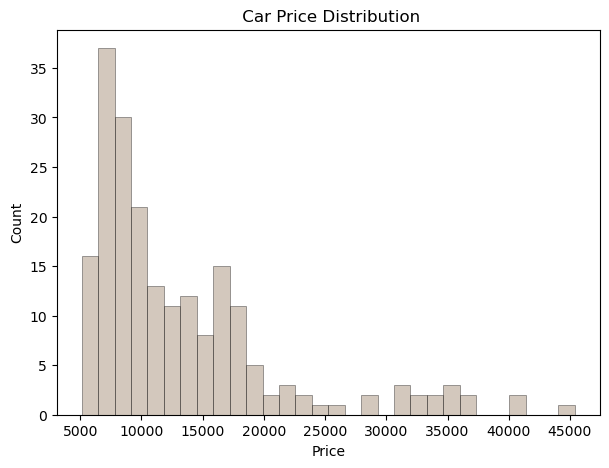

In [20]:
# Plotting a histogram of 'prices' 
plt.figure(figsize=(7, 5))
plt.hist(cars_df['price'], bins=30, color='#A9927D', edgecolor='black', alpha=0.5, linewidth=0.5)
plt.title(' Car Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

### <span style="font-weight: 400">We can observe that most of the cars are priced under $15,000.</span>

Text(0.5, 1.0, 'Market share of various car brands')

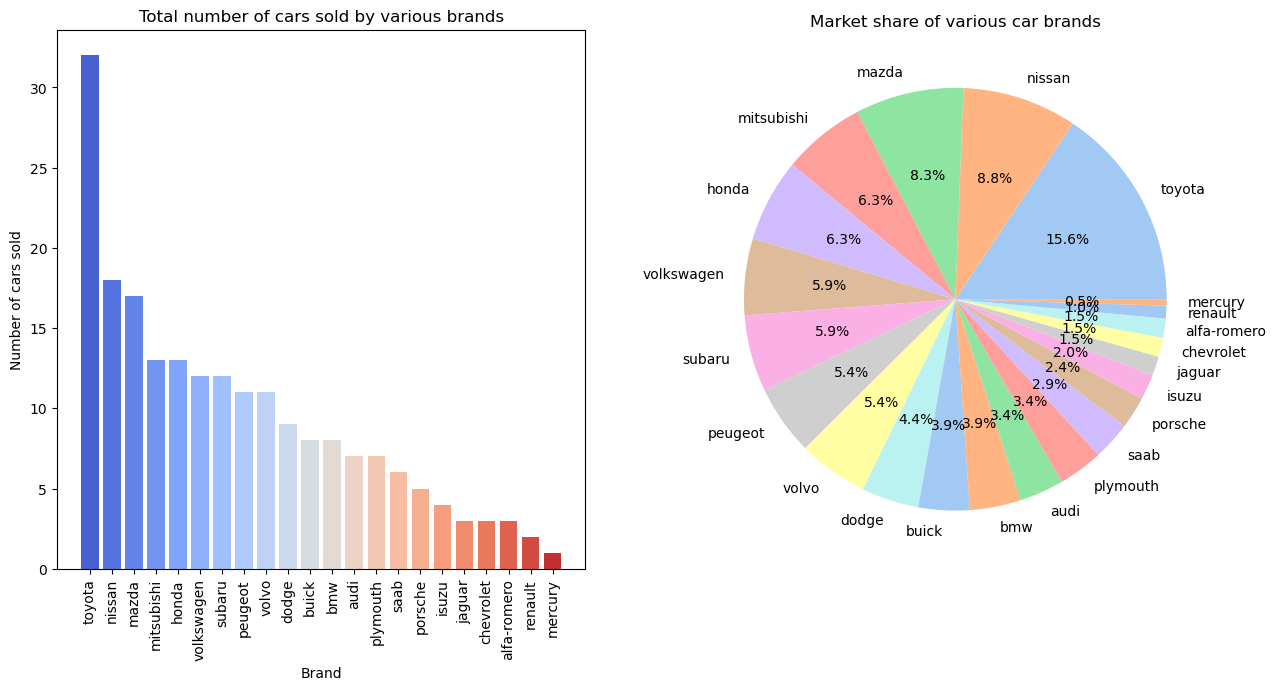

In [21]:
# Visualizing total number of cars sold by different companies
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
carcomp = cars_df['CarBrand'].value_counts()
x = carcomp.index
y = carcomp.values
bar_colors = sns.color_palette("coolwarm", len(x))
plt.bar(x, y, color=bar_colors)
plt.xlabel('Brand')
plt.xticks(rotation=90)
plt.ylabel('Number of cars sold')
plt.title('Total number of cars sold by various brands')

plt.subplot(1, 2, 2)
pie_colors = sns.color_palette("pastel", len(x))
plt.pie(carcomp,labels=x, autopct='%1.1f%%', colors=pie_colors)
plt.title('Market share of various car brands')

### <span style="font-weight: 400">We observe that Toyota has the highest share of cars that are sold and has a presence of 15.6% in the market. The second highest being Nissan with a market share of 8.8%. The difference between the most popular and the second most popular brand is almost double.</span>

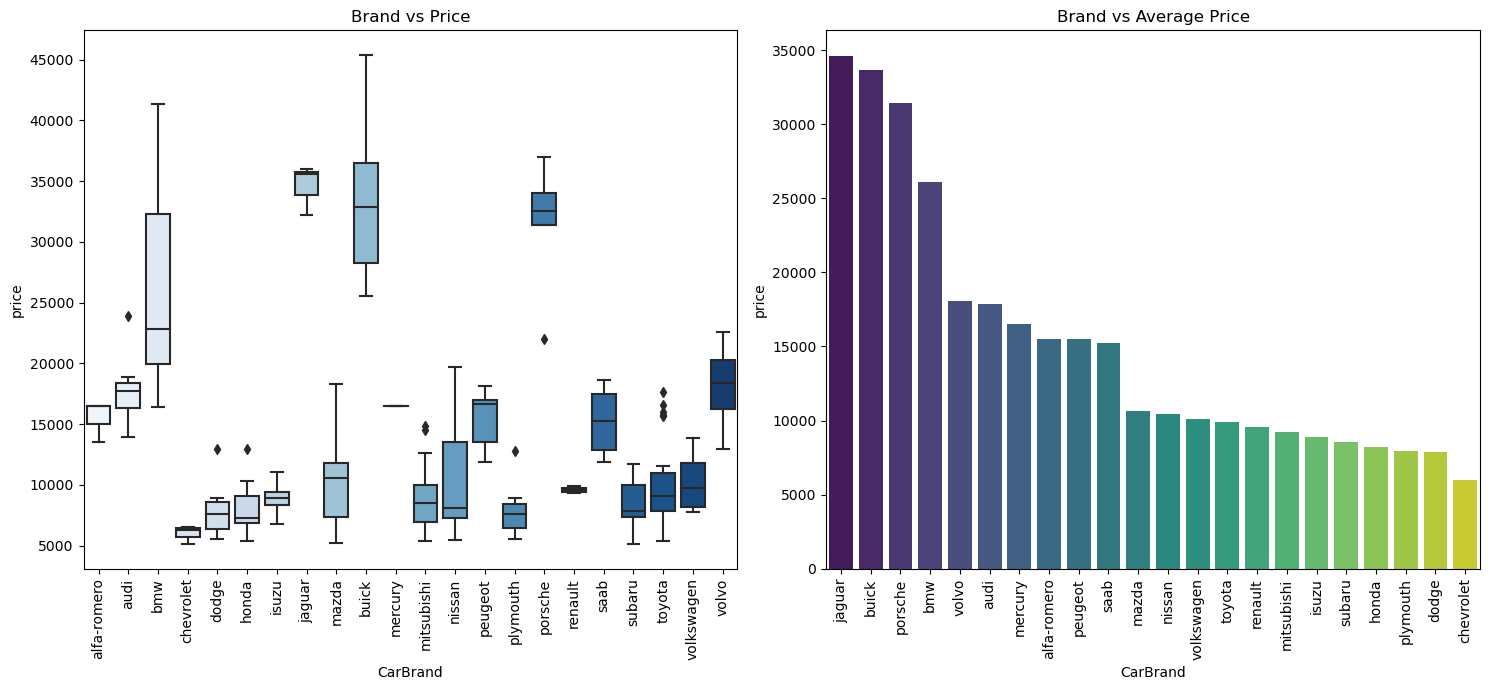

In [22]:
# Visualizing brand-wise car prices using a boxplot and barplot
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
sns.boxplot(x="CarBrand", y="price", data=cars_df, palette="Blues")
plt.xticks(rotation=90)
plt.title("Brand vs Price")

plt.subplot(1, 2, 2)
x = pd.DataFrame(cars_df.groupby("CarBrand")["price"].mean().sort_values(ascending=False))
sns.barplot(x=x.index, y="price", data=x, palette="viridis") 
plt.xticks(rotation=90)
plt.title("Brand vs Average Price")
plt.tight_layout()
plt.show()

### <span style="font-weight: 400">We observe that Jaguar and Buick produce cars that are costlier than the average car price and hence can be considered as high-end category.</span>

Text(0.5, 1.0, 'Fuel type vs Average price')

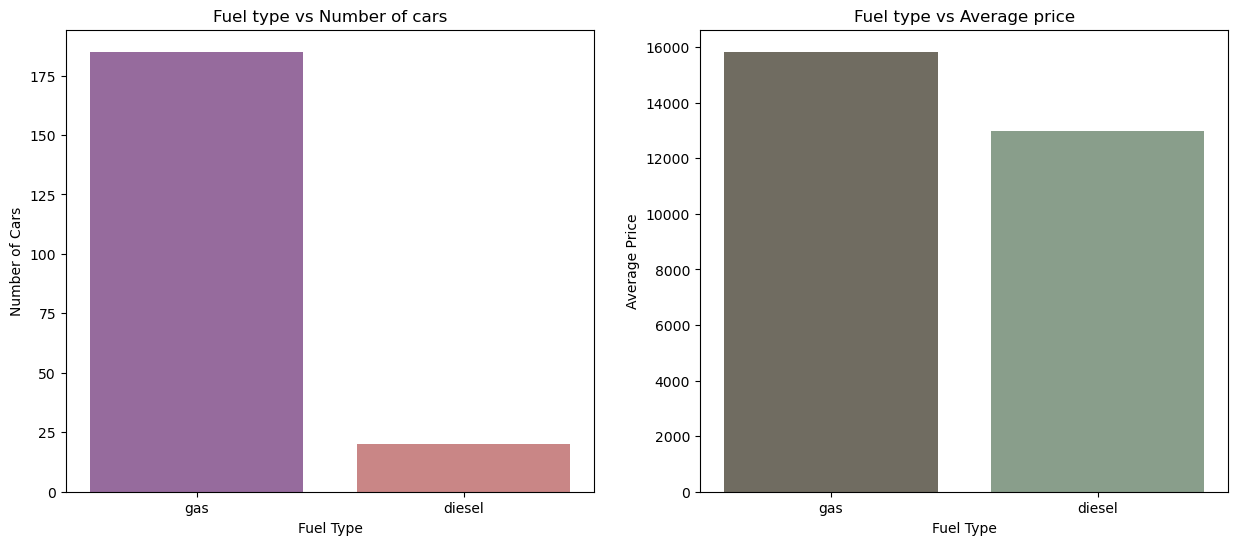

In [23]:
# Analyzing fuel type distribution and its relationship with car prices
fueltype = cars_df['fueltype'].value_counts()
x = fueltype.index
y = fueltype.values
fuel_avg_price = cars_df.groupby('fueltype')['price'].mean()

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.bar(x, y, color=['#966B9D', '#C98686'])
plt.xlabel('Fuel Type')
plt.ylabel('Number of Cars')
plt.title('Fuel type vs Number of cars')

plt.subplot(1, 2, 2)
plt.bar(x, fuel_avg_price, color=['#706C61', '#899E8B'])
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.title('Fuel type vs Average price')

In [24]:
print(fuel_avg_price)

fueltype
diesel    15838.1500
gas       12999.7982
Name: price, dtype: float64


### <span style="font-weight: 400">We observe that there is a significant demand for cars that run on gas compared to those that run on diesel. Additionally, we can see that the average prices of cars running on gas and diesel do not differ significantly.</span>

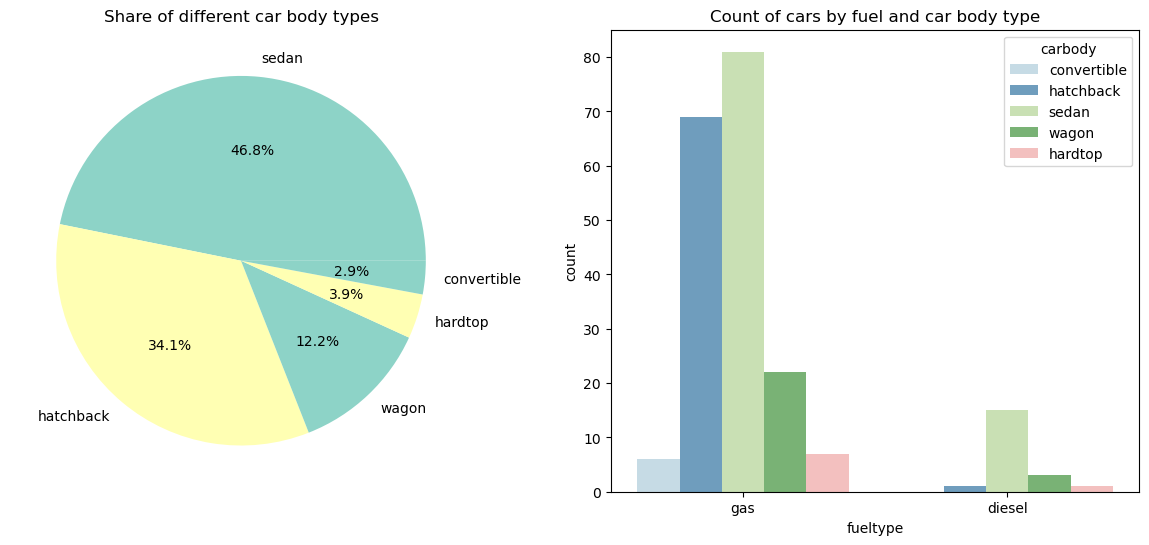

In [25]:
# Visualizing car body types and their distribution
carbody = cars_df['carbody'].value_counts()
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
pie_colors = sns.color_palette("Set3", len(x))
plt.pie(carbody,labels=carbody.index, autopct='%1.1f%%', colors=pie_colors)
plt.title('Share of different car body types')

plt.subplot(1, 2, 2)
sns.countplot(x='fueltype', hue='carbody', data=cars_df, palette='Paired', alpha=0.7)
plt.title('Count of cars by fuel and car body type')
plt.show()

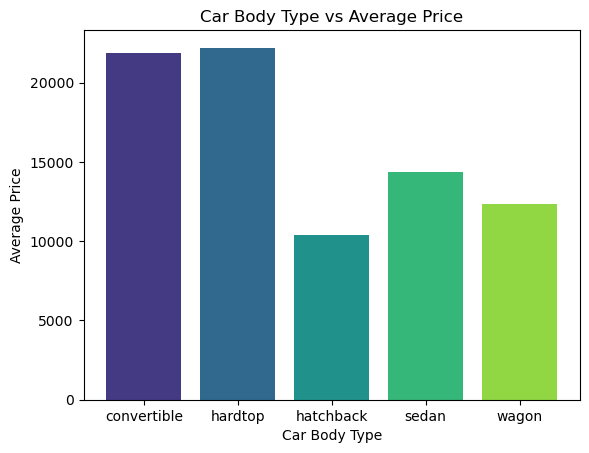

In [26]:
# Analyzing the relationship between car body type and average price

bar_colors = sns.color_palette("viridis", len(carbody))
plt.bar(carbody.index.sort_values(), cars_df.groupby('carbody')['price'].mean(), color=bar_colors)
plt.title('Car Body Type vs Average Price')
plt.xlabel('Car Body Type')
plt.ylabel('Average Price')
plt.show()

In [27]:
cars_df.groupby('carbody')['price'].mean()

carbody
convertible    21890.500000
hardtop        22208.500000
hatchback      10376.652386
sedan          14344.270833
wagon          12371.960000
Name: price, dtype: float64

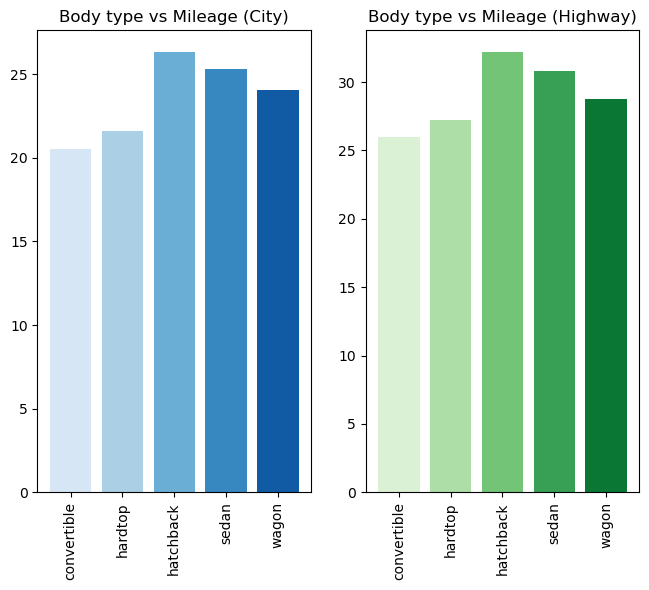

In [28]:
# Analyzing the relationship between car body type and mileage
plt.figure(figsize=(12, 6))
city_mileage_colors = sns.color_palette("Blues", len(carbody))
highway_mileage_colors = sns.color_palette("Greens", len(carbody))

plt.subplot(1, 3, 1)
plt.bar(carbody.index.sort_values(), cars_df.groupby('carbody')['citympg'].mean(), color=city_mileage_colors)
plt.title('Body type vs Mileage (City)')
plt.xticks(rotation=90)

plt.subplot(1, 3, 2)
plt.bar(carbody.index.sort_values(), cars_df.groupby('carbody')['highwaympg'].mean(), color=highway_mileage_colors)
plt.title('Body type vs Mileage (Highway)')
plt.xticks(rotation=90)
plt.show()

### <span style="font-weight: 400">We observe that sedans and hatchbacks are the most commonly purchased car types. Additionally, cars running on gas and belonging to the sedan class exhibit the highest preference. The average price of sedans is approximately $14,350. Convertibles and hardtops, which fall into the high-end category, have a higher average price, resulting in lower sales. Despite not being the least expensive or offering the highest mileage, the sedan class remains the preferred choice for the majority of customers.</span>

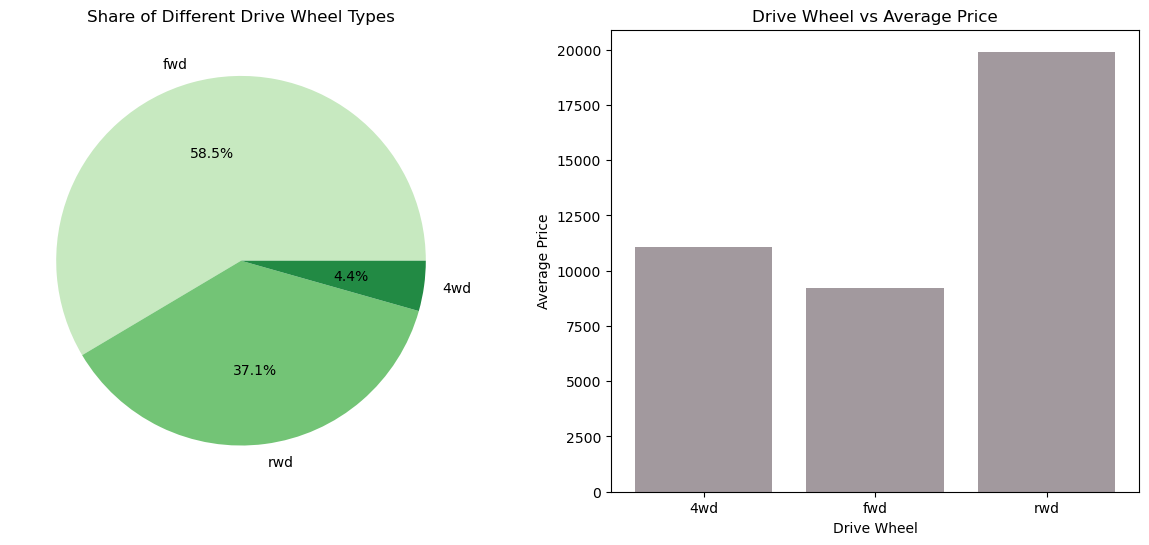

In [29]:
# Analyzing the relationship between drive wheel type and average price
drivewheel = cars_df['drivewheel'].value_counts()
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
pie_colors = sns.color_palette("Greens", len(drivewheel))
plt.pie(drivewheel, labels=drivewheel.index, autopct='%1.1f%%', colors=pie_colors)
plt.title('Share of Different Drive Wheel Types')

plt.subplot(1, 2, 2)
plt.bar(drivewheel.index.sort_values(), cars_df.groupby('drivewheel')['price'].mean(), color='#A2999E')
plt.title('Drive Wheel vs Average Price')
plt.xlabel('Drive Wheel')
plt.ylabel('Average Price')
plt.show()

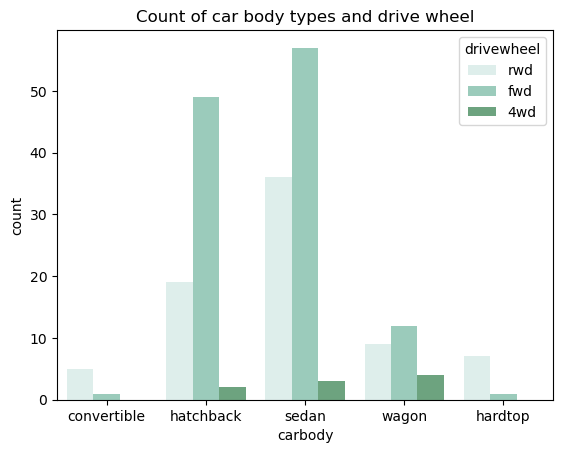

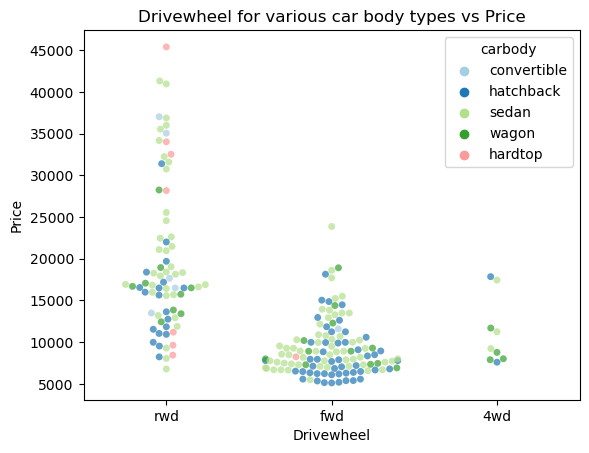

In [30]:
sns.countplot(x='carbody', hue='drivewheel', data=cars_df, palette='BuGn', alpha=0.7)
plt.title('Count of car body types and drive wheel')
plt.show()

sns.swarmplot(x='drivewheel',y='price',hue='carbody',data=cars_df,palette='Paired', alpha=0.7)
plt.title('Drivewheel for various car body types vs Price')
plt.xlabel('Drivewheel')
plt.ylabel('Price')
plt.show()

- FWD wheel drive is the highest sold

- FWD wheel drive has the lowest average price

- FWD wheel drive with the combination of Sedan body type is the highest preferred

- Most of the Sedan FWD wheel drive are priced around $10,000

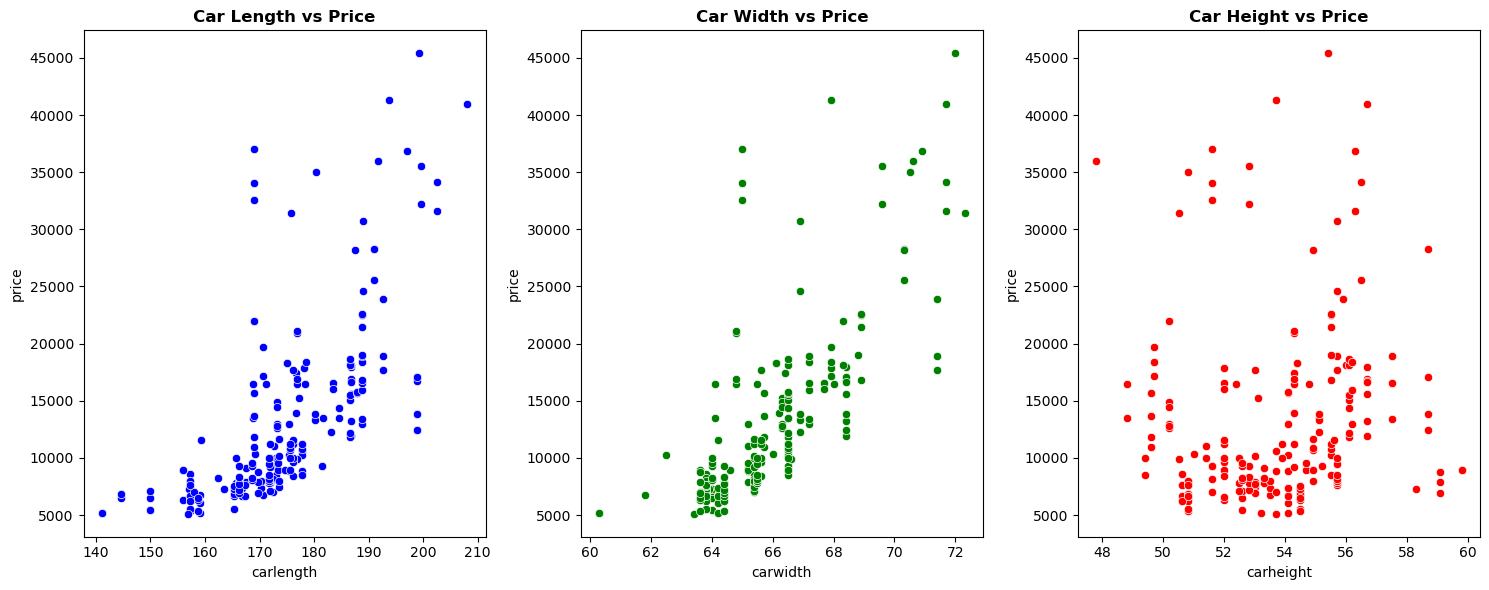

In [31]:
# Analyzing the relationship between car dimensions and price

# Set up the figure and subplots
plt.figure(figsize=(15, 6))

# Subplot 1: Scatter plot - Car Length vs Price
plt.subplot(1, 3, 1)
sns.scatterplot(x="carlength", y="price", data=cars_df, color="blue")
plt.title("Car Length vs Price", fontweight="black")

# Subplot 2: Scatter plot - Car Width vs Price
plt.subplot(1, 3, 2)
sns.scatterplot(x="carwidth", y="price", data=cars_df, color="green")
plt.title("Car Width vs Price", fontweight="black")

# Subplot 3: Scatter plot - Car Height vs Price
plt.subplot(1, 3, 3)
sns.scatterplot(x="carheight", y="price", data=cars_df, color="red")
plt.title("Car Height vs Price", fontweight="black")

plt.tight_layout()
plt.show()

- We can observe that carlength and carwidth features highly correlate with price
- An increase in the carlength and carwidth is directly proportional to price
- We see that carheight is highly scattered and hence is of not much use to us

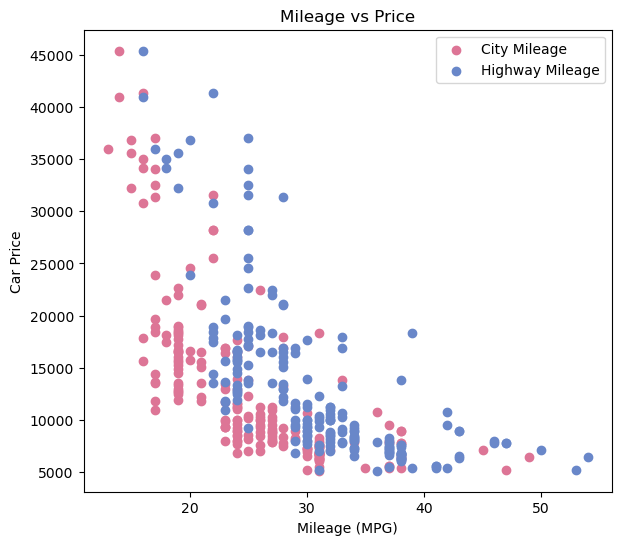

In [32]:
# Analyzing the relationship between mileage and price
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)

plt.scatter(cars_df['citympg'], cars_df['price'], label='City Mileage', color="#DD7596")
plt.scatter(cars_df['highwaympg'], cars_df['price'], label='Highway Mileage', color="#6987C9")
plt.title('Mileage vs Price')
plt.xlabel('Mileage (MPG)')
plt.ylabel('Car Price')
plt.legend()

plt.show()

### <span style="font-weight: 400">We can observe that mileage is inversely proportional to the price. Hence, we can say that increase in car mileage will decrease price of the car.</span>

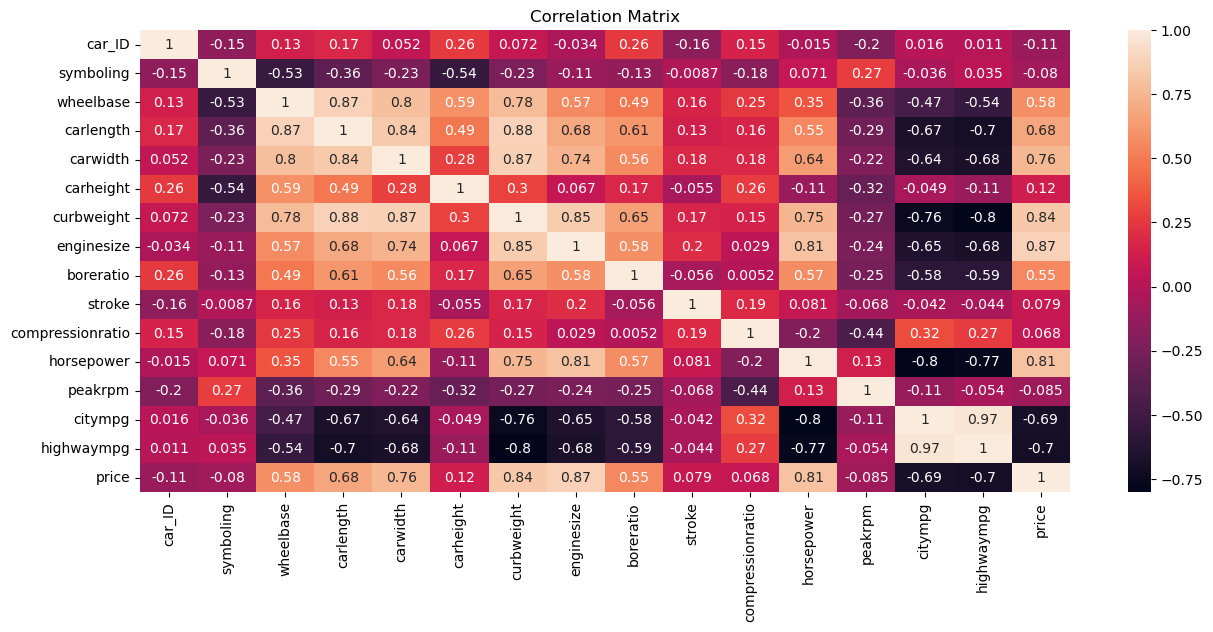

In [33]:
# Visualizing the correlation matrix
correlation_matrix = cars_df.corr(numeric_only=True)
plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

### List of useful Numerical Features:

- Wheelbase
- Car Length
- Car Width
- Curb Weight
- Engine Size
- Bore Ratio
- Horsepower
- City MPG
- Highway MPG

### List of useful Categorical Features:

- Car Name
- Fuel Type
- Aspiration
- Door Number
- Car Body
- Drive Wheel
- Engine Type
- Cyclinder Number
- Fuel System

### <span style="font-size: 18px">Model Training & Performance Evaluation —</span>

In [34]:
# Creating an instance of StandardScalar and LabelEncoder
scalar = StandardScaler()
le = LabelEncoder()

In [35]:
# Using StandardScaler to standardize the selected numerical columns in cars_df
num_cols = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg', 'price']
cars_df[num_cols] = scalar.fit_transform(cars_df[num_cols])

In [36]:
# Using the LabelEncoder to transform the selected categorical columns in cars_df
cat_cols = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'fuelsystem']
cars_df[cat_cols] = cars_df[cat_cols].apply(le.fit_transform)

In [37]:
# Concatenate the standardized numerical columns and label-encoded categorical columns
new_cars_df = pd.concat([cars_df[num_cols], cars_df[cat_cols]], axis=1)
new_cars_df

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,fueltype,aspiration,doornumber,carbody,drivewheel,enginetype,cylindernumber,fuelsystem
0,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.519071,0.174483,-0.646553,-0.546059,0.027391,1,0,1,0,2,0,2,5
1,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.519071,0.174483,-0.646553,-0.546059,0.404461,1,0,1,0,2,0,2,5
2,-0.708596,-0.231513,-0.190566,0.514882,0.604046,-2.404880,1.264536,-0.953012,-0.691627,0.404461,1,0,1,2,2,5,3,5
3,0.173698,0.207256,0.136542,-0.420797,-0.431076,-0.517266,-0.053668,-0.186865,-0.109354,0.084485,1,0,0,3,1,3,2,5
4,0.107110,0.207256,0.230001,0.516807,0.218885,-0.517266,0.275883,-1.106241,-1.273900,0.523668,1,0,0,3,0,3,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.721873,1.198549,1.398245,0.763241,0.339248,1.666445,0.250533,-0.340094,-0.400490,0.447752,1,0,0,3,2,3,2,5
201,1.721873,1.198549,1.351515,0.949992,0.339248,1.666445,1.416637,-0.953012,-0.837195,0.723810,1,1,0,3,2,3,2,5
202,1.721873,1.198549,1.398245,0.878757,1.109571,0.926204,0.757535,-1.106241,-1.128332,1.029983,1,0,0,3,2,5,3,5
203,1.721873,1.198549,1.398245,1.273437,0.435538,-1.183483,0.047732,0.119594,-0.546059,1.153582,0,1,0,3,2,3,3,3


In [38]:
# Extract features (X) by dropping the 'price' column
X = new_cars_df.drop(columns='price')

# Extract the target variable (y)
y = new_cars_df['price']

In [39]:
X.shape

(205, 17)

In [40]:
# Initializing empty lists to store R-squared scores
training_score = []
testing_score = []

# Initializing empty lists to store MAE and MSE
mae_training_scores = []
mse_training_scores = []
mae_testing_scores = []
mse_testing_scores = []
rmse_training_scores = []
rmse_testing_scores = []

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
def model_prediction(model):
    # Train the model on the training data
    model.fit(X_train,y_train)
    
    # Make predictions on the training and testing data
    X_train_pred = model.predict(X_train)
    X_test_pred = model.predict(X_test)
    
    # Calculate R-squared scores for training and testing predictions
    training_score.append(r2_score(y_train, X_train_pred) * 100)
    testing_score.append(r2_score(y_test, X_test_pred) * 100)
    
    # Calculate MAE and MSE for training predictions
    mae_training = mean_absolute_error(y_train, X_train_pred)
    mse_training = mean_squared_error(y_train, X_train_pred)
    rmse_training = mean_squared_error(y_train, X_train_pred, squared=False)
    
    # Calculate MAE and MSE for testing predictions
    mae_testing = mean_absolute_error(y_test, X_test_pred)
    mse_testing = mean_squared_error(y_test, X_test_pred)
    rmse_testing = mean_squared_error(y_test, X_test_pred, squared=False)
    
    # Append the scores to the respective lists
    mae_training_scores.append(mae_training)
    mse_training_scores.append(mse_training)
    mae_testing_scores.append(mae_testing)
    mse_testing_scores.append(mse_testing)
    rmse_training_scores.append(rmse_training)
    rmse_testing_scores.append(rmse_testing)

In [42]:
# Predictions of various models
model_prediction(LinearRegression())
model_prediction(DecisionTreeRegressor(random_state=5))
model_prediction(KNeighborsRegressor(n_neighbors=3))
model_prediction(RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42))
model_prediction(AdaBoostRegressor())
model_prediction(GradientBoostingRegressor())
model_prediction(XGBRegressor())

In [43]:
# Model comparison
models = ['Linear Regression', 'Decision Tree', 'KNN', 'Random Forest', 'Ada Boost', 'Gradient Boost', 'XGBoost']
model_df = pd.DataFrame({'Algorithms': models,
                        'Training Accuracy': training_score,
                        'Testing Accuracy': testing_score,
                        'MAE Training': mae_training_scores,
                        'MAE Testing': mae_testing_scores,
                        'MSE Training': mse_training_scores,
                        'MSE Testing': mse_testing_scores,
                        'RMSE Training': rmse_training_scores,
                        'RMSE Testing': rmse_testing_scores
                        })
model_df

,Algorithms,Training Accuracy,Testing Accuracy,MAE Training,MAE Testing,MSE Training,MSE Testing,RMSE Training,RMSE Testing
0,Linear Regression,85.284471,79.126990,0.277461,0.337425,0.138182,0.259453,0.371729,0.509366
1,Decision Tree,99.865371,89.406874,0.008114,0.247899,0.001264,0.131673,0.035556,0.362868
2,KNN,92.112250,85.455233,0.163978,0.269374,0.074068,0.180793,0.272154,0.425197
3,Random Forest,98.440198,95.687210,0.077161,0.161304,0.014647,0.053608,0.121024,0.231535
4,Ada Boost,95.729280,91.400092,0.169244,0.249664,0.040103,0.106898,0.200258,0.326952
5,Gradient Boost,99.260399,91.795575,0.063395,0.213885,0.006945,0.101982,0.083337,0.319346
6,XGBoost,99.865014,93.385423,0.009366,0.193602,0.001268,0.082220,0.035603,0.286740


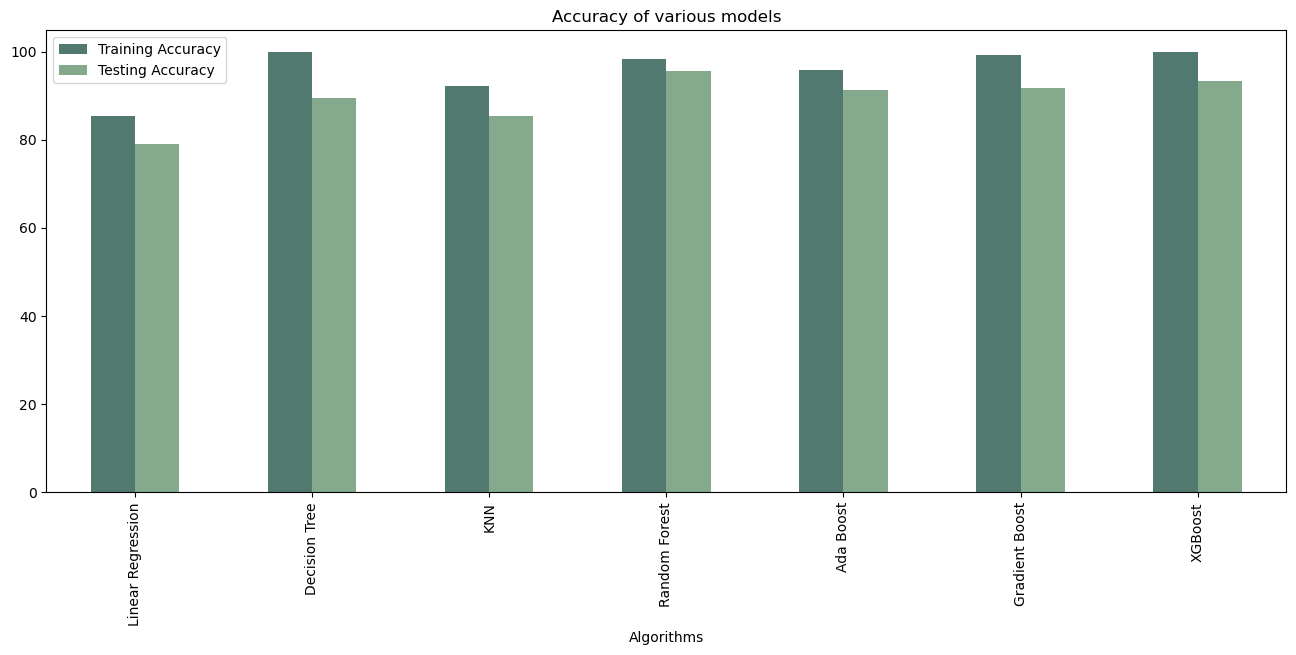

In [44]:
# Visualizing the performance of various models
fig, ax = plt.subplots(figsize=(16, 6))
model_df.plot(x="Algorithms", y=["Training Accuracy", "Testing Accuracy"], kind="bar", ax=ax, color=['#52796F', '#84A98C'])
ax.legend(["Training Accuracy", "Testing Accuracy"], loc='upper left')
plt.title("Accuracy of various models")
plt.show()

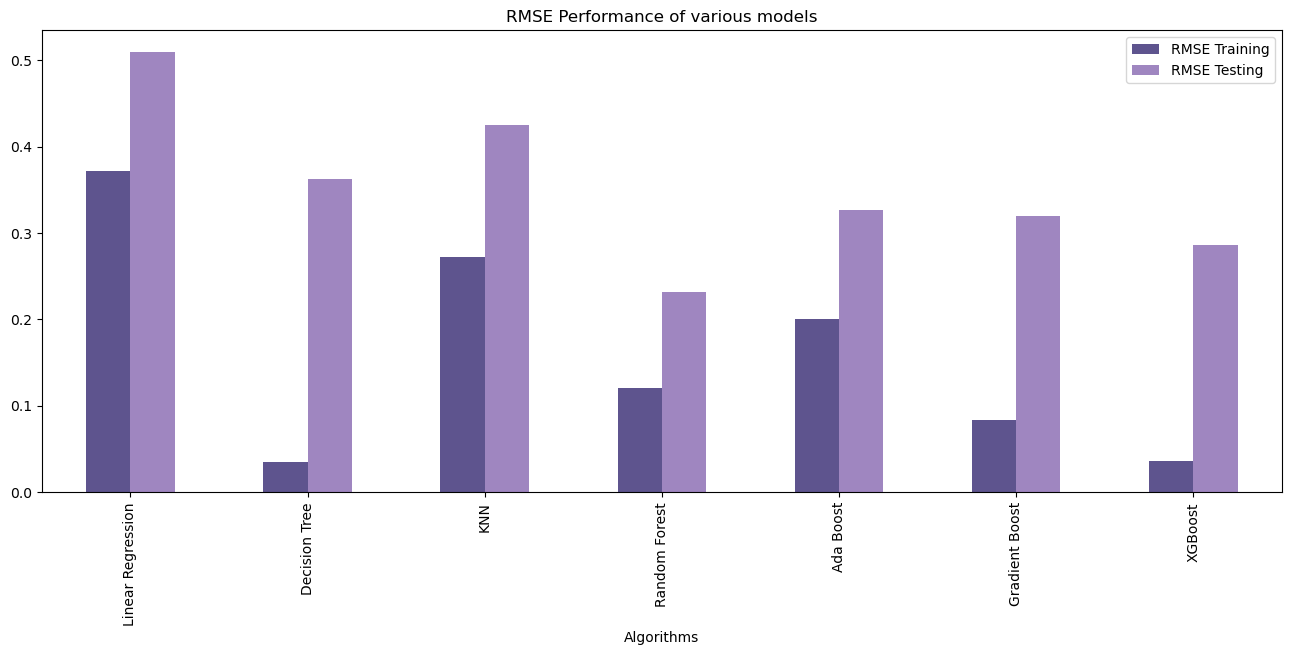

In [45]:
# Visualizing the performance of various models including RMSE
fig, ax = plt.subplots(figsize=(16, 6))
model_df.plot(x="Algorithms", y=["RMSE Training", "RMSE Testing"], kind="bar", ax=ax, color=['#5E548E', '#9F86C0'])
ax.legend(["RMSE Training", "RMSE Testing"])
plt.title("RMSE Performance of various models")
plt.show()

### <span style="font-size: 16px; font-weight: 400">In summary, <span style="font-weight: bold">Random Forest</span> and <span style="font-weight: bold">XGBoost</span> seem to be the top performers, showing high accuracy and robustness on both training and testing datasets. <span style="font-style: italic">Decision Tree</span> and <span style="font-style: italic">Gradient Boost</span> may benefit from further regularization or hyperparameter tuning to improve generalization.</span>